#### We will reproduce some of work one the diabetes hospitalisation data in julia.

In [1]:
using Queryverse, Query, VegaLite, DataFrames

#### First load the dataset we saved earliear.

In [2]:
diabetes = load("diabetes.csv")

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
2278392,8222157,"""Caucasian""","""Female""","""[0-10)""",#NA,6,25,1,1,"""""","""Pediatrics-Endocrinology""",41,0,1,0,0,0,250.83,#NA,#NA,1,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""NO"""
149190,55629189,"""Caucasian""","""Female""","""[10-20)""",#NA,1,1,7,3,"""""","""NA""",59,0,18,0,0,0,276.0,250.01,255.0,9,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Up""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""",""">30"""
64410,86047875,"""AfricanAmerican""","""Female""","""[20-30)""",#NA,1,1,7,2,"""""","""NA""",11,5,13,2,0,1,648.0,250.0,#NA,6,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""NO"""
500364,82442376,"""Caucasian""","""Male""","""[30-40)""",#NA,1,1,7,2,"""""","""NA""",44,1,16,0,0,0,8.0,250.43,403.0,7,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Up""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""","""NO"""
16680,42519267,"""Caucasian""","""Male""","""[40-50)""",#NA,1,1,7,1,"""""","""NA""",51,0,8,0,0,0,197.0,157.0,250.0,5,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""","""NO"""
35754,82637451,"""Caucasian""","""Male""","""[50-60)""",#NA,2,1,2,3,"""""","""NA""",31,6,16,0,0,0,414.0,411.0,250.0,9,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""",""">30"""
55842,84259809,"""Caucasian""","""Male""","""[60-70)""",#NA,3,1,2,4,"""""","""NA""",70,1,21,0,0,0,414.0,411.0,#NA,7,"""None""","""None""","""Steady""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""","""NO"""
63768,114882984,"""Caucasian""","""Male""","""[70-80)""",#NA,1,1,7,5,"""""","""NA""",73,0,12,0,0,0,428.0,492.0,250.0,8,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""",""">30"""
12522,48330783,"""Caucasian""","""Female""","""[80-90)""",#NA,2,1,4,13,"""""","""NA""",68,2,28,0,0,0,398.0,427.0,38.0,8,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""

In [3]:
diabetes |> typeof # the type of the dataset is a csv file, we need to convert it into a dataframe

CSVFiles.CSVFile

In [4]:
diabetes_df = diabetes |> #convert it into a data frame
  DataFrame 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
1,2278392,8222157,Caucasian,Female,[0-10),missing,6,25,1,1,,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
2,149190,55629189,Caucasian,Female,[10-20),missing,1,1,7,3,,NA,59,0,18,0,0,0,276.0,250.01,255.0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
3,64410,86047875,AfricanAmerican,Female,[20-30),missing,1,1,7,2,,NA,11,5,13,2,0,1,648.0,250.0,missing,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
4,500364,82442376,Caucasian,Male,[30-40),missing,1,1,7,2,,NA,44,1,16,0,0,0,8.0,250.43,403.0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
5,16680,42519267,Caucasian,Male,[40-50),missing,1,1,7,1,,NA,51,0,8,0,0,0,197.0,157.0,250.0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,35754,82637451,Caucasian,Male,[50-60),missing,2,1,2,3,,NA,31,6,16,0,0,0,414.0,411.0,250.0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
7,55842,84259809,Caucasian,Male,[60-70),missing,3,1,2,4,,NA,70,1,21,0,0,0,414.0,411.0,missing,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,63768,114882984,Caucasian,Male,[70-80),missing,1,1,7,5,,NA,73,0,12,0,0,0,428.0,492.0,250.0,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
9,12522,48330783,Caucasian,Female,[80-90),missing,2,1,4,13,,NA,68,2,28,0,0,0,398.0,427.0,38.0,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,15738,63555939,Caucasian,Female,[90-100),missing,3,3,4,12,,InternalMedicine,33,3,18,0,0,0,434.0,198.0,486.0,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetes_df |> #now the type is a data frame
  typeof

DataFrames.DataFrame

### We can get the description of the dataset using the describe() function which will give us general information about the dataset, as we have already cleaned this dataset using R, we can find the data types of the dataset are in good format.

In [6]:
diabetes_df |> 
  describe

,variable,mean,min,median,max,nunique,nmissing,eltype
1,encounter_id,1.65202e8,12522,1.52389e8,443867222,,,Int64
2,patient_nbr,5.43304e7,135,4.55051e7,189502619,,,Int64
3,race,,AfricanAmerican,,Other,6,,String
4,gender,,Female,,Unknown/Invalid,3,,String
5,age,,[0-10),,[90-100),10,,String
6,weight,,,,,,101766,Union{}
7,admission_type_id,2.02401,1,1.0,8,,,Int64
8,discharge_disposition_id,3.71564,1,1.0,28,,,Int64
9,admission_source_id,5.75444,1,7.0,25,,,Int64
10,time_in_hospital,4.39599,1,4.0,14,,,Int64


Next, we can do some simple analysis on the dataset, for example, we can group the dataset by gender and count the number of patients in each gender and see if there are any differences between male and female.

In [11]:
by(diabetes_df, :gender) do group
    DataFrame(encounters_cnt = sum(group[:encounter_id])) #group by gender, count the number of encounters in each gender
    
end

,gender,encounters_cnt
1,Female,9006559976846
2,Male,7804767827802
3,Unknown/Invalid,582863820


### We can see that there are more encounters are envolved of female than male.

### We can also generate a histogram of the patients for different age groups.

In [8]:
using Gadfly # a good package for plotting in julia

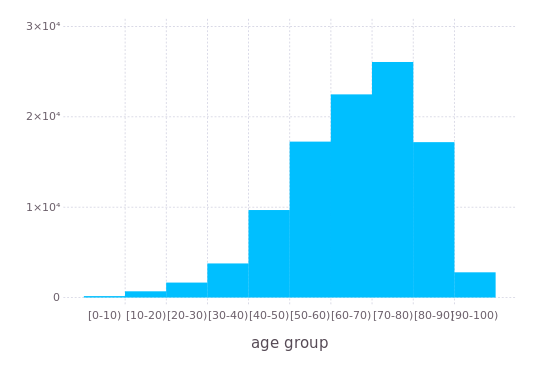

In [9]:
plot(diabetes,x=:age, Guide.xlabel("age group"), Geom.histogram)

We can find that the group with highest number of patients are 70-80, followed by 60-70.